TypeError: object of type 'NoneType' has no len()

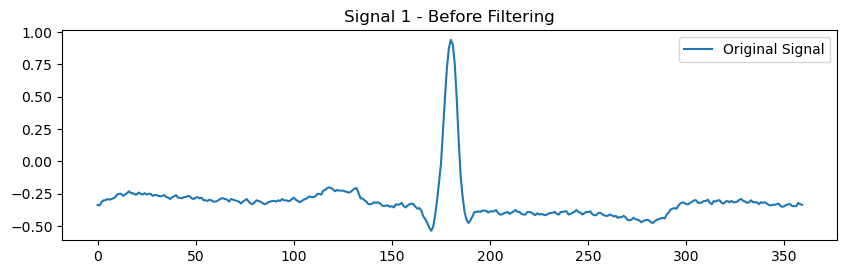

In [1]:
import pandas as pd
import filtering
import importlib
importlib.reload(filtering) # reload 해야 함,,
import matplotlib.pyplot as plt

# import numpy
# from scipy.signal import butter, filtfilt


# def band_pass_filter(data, low_cutoff, high_cutoff, fs, order=2):
#     nyquist = 0.5 * fs
#     low = low_cutoff / nyquist
#     high = high_cutoff / nyquist
#     b, a = butter(order, [low, high], btype='band', analog=False)
#     y = filtfilt(b, a, data)

#     print(f"Filtered signal length: {len(y)}")
#     print(f"Filtered signal sample: {y[:10]}") 

#     return y


df = pd.read_csv('data_original.csv')

max_plots = 5

cutoff_low = 0.1
cutoff_high = 50
fs = 360 
order = 5

filtered_signals = []

for index, row in df.iterrows():
    # 필터링 전 신호
    original_signal = row.values
    
    # 필터링된 신호
    filtered_signal = filtering.band_pass_filter(original_signal, cutoff_low,cutoff_high, fs, order)
    
    # filtered_signals.append(filtered_signal)
    if index < max_plots:

        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        plt.plot(original_signal, label='Original Signal')
        plt.title(f'Signal {index + 1} - Before Filtering')
        plt.legend()

        print(len(filtered_signal))

        plt.subplot(2, 1, 2)
        plt.plot(filtered_signal, label='Filtered Signal', color='orange')
        plt.title(f'Signal {index + 1} - After Filtering')
        plt.legend()
    
        plt.tight_layout()
        plt.show()

       
    
filtered_df = pd.DataFrame(filtered_signals)

filtered_df.to_csv('data_filtering.csv', index=False)
